In [1]:
source('/Users/dongmeichen/GitHub/SDM/R/model_output_functions.R')

In [2]:
train <- merge.files('train')

Merging train data...


In [3]:
path <- '/Users/dongmeichen/Documents/beetle/data/'
out <- '/Users/dongmeichen/Documents/beetle/output/'

In [4]:
i <- 5
model <- paste0('model', i)

In [5]:
coeff <- read.csv(paste0(path, model,'/coefficients.csv'), stringsAsFactors = FALSE)

In [6]:
if(i==1){
    ndf <- train[,-which(colnames(train) %in% c("x", "y", "x.new", "y.new", "xy"))]
}else{
    squares <- grep('_sq', coeff$predictor, value=TRUE)
    cubes <- grep('_cub', coeff$predictor, value=TRUE)
    interactions <- grep(':', coeff$predictor, value=TRUE)
    singles <- coeff$predictor[!(coeff$predictor %in% c(squares, cubes, interactions))]
    ndf <- get.data.frame(train)
}

Calculated JanTmin_sq ...
Calculated etopo1_sq ...
Calculated lat_sq ...
Calculated Mar20_sq ...
Calculated vpd_sq ...
Calculated ddAugJul_sq ...
Calculated cwd_sq ...
Calculated AugMaxT_sq ...
Calculated ddAugJun_sq ...
Calculated PPT_sq ...
Calculated summerP2_sq ...
Calculated POctSep_sq ...
Calculated Pmean_sq ...
Calculated PMarAug_sq ...
Calculated max.drop_sq ...
Calculated age_sq ...
Calculated Acs_sq ...
Calculated maxT_sq ...
Calculated mi_sq ...
Calculated OctTmin_sq ...
Calculated OctMin_sq ...
Calculated summerP0_sq ...
Calculated summerP1_sq ...
Calculated sum9_diff_sq ...
Calculated PcumOctSep_sq ...
Calculated Tmin_sq ...
Calculated MarMin_sq ...
Calculated wd_sq ...
Calculated AugTmean_cub ...
Calculated lat_cub ...
Calculated TMarAug_cub ...
Calculated JanMin_cub ...
Calculated minT_cub ...
Calculated Jan20_cub ...
Calculated fallTmean_cub ...
Calculated lon_cub ...
Calculated Tvar_cub ...
Calculated MarTmin_cub ...
Calculated AugTmax_cub ...
Calculated winterMin_cub 

In [7]:
if(i==1){
    drops <- c('summerP2')
}else if(i==2){
    drops <- c('summerP1', 'lat:summerP1', 'lon:summerP1', 'etopo1:summerP2')
}else if(i==3){
    drops <- c('sum9_t1', 'summerP2', 'lon:summerP1', 'lat:summerP0', 'etopo1:summerP2')
}else{
    drops <- c('sum9_t1', 'summerP2', 'lon:summerP1', 'lat:summerP0', 'etopo1:summerP1', 'density:summerP1')
}

In [8]:
strings <- capture.output(var.string(coeff, drops))
mod.string <- paste0('glm(btl_t ~ ', strings, ', data=ndf, family=binomial())')

In [9]:
ptm <- proc.time()
mod <- eval(parse(text=mod.string))
proc.time() - ptm

   user  system elapsed 
862.557  36.142 954.977 

In [10]:
summary(mod)


Call:
glm(formula = btl_t ~ density:Tmean + lat:TMarAug + AugTmean_cub + 
    sum9_diff + lat_cub + TMarAug_cub + lon:lat:etopo1 + density:TMarAug + 
    etopo1:vpd + JanTmin_sq + lon:sum9_diff + lon:Jan20 + sum9_t2 + 
    density:TOctSep + density:vpd + lat:maxAugT + JanMin_cub + 
    Acs + etopo1 + etopo1:AugTmean + etopo1_sq + minT_cub + lat:AugTmean + 
    lon:JanTmin + etopo1:cwd + lat:summerTmean + lat_sq + maxAugT + 
    OctMin + Tvar + lat:OctTmin + Jan20_cub + lat:mi + Tmean + 
    lon:Mar20 + lon:OctMin + PMarAug + etopo1:TOctSep + Tmin + 
    etopo1:mi + lon:summerP0 + lon:Acs + lon:Tmean + fallTmean_cub + 
    MarMin + lon:Tmin + lat:fallTmean + lat:maxT + lat:JanTmin + 
    lat:POctSep + lat:TOctSep + lon:summerP2 + lon_cub + etopo1:OctTmin + 
    lat:sum9_diff + etopo1:ddAugJul + lon:AugTmean + Jan20 + 
    ddAugJun + summerTmean + lat:MarTmin + vgt + lon:OctTmin + 
    Mar20_sq + vpd_sq + lon:maxAugT + etopo1:MarTmin + etopo1:maxAugT + 
    lon + etopo1:summerTmean + fa

In [12]:
head(ndf)

btl_t,sum9_diff,sum9_t2,Acs,etopo1,maxAugT,OctMin,Tvar,Tmean,PMarAug,⋯,MarTmin_cub,AugTmax_cub,winterMin_cub,OptTsum_cub,age_cub,sum9_diff_cub,Tmean_cub,summerTmean_cub,density_cub,TOctSep_cub
0,0,0,0,994,31,-0.9903192,8.595260,17.92430,94.05243,⋯,24.98798,38344.81,-747.3379,373248,0,0,5758.730,21926.32,1.855666e+09,5765.615
0,0,0,0,948,31,-0.8581916,8.630087,18.14168,87.02101,⋯,32.42007,38991.29,-732.3474,274625,0,0,5970.802,22524.15,2.007043e+01,5978.004
0,0,0,0,944,31,-0.5260306,8.661894,18.15920,81.11690,⋯,31.35720,38950.24,-717.2137,250047,0,0,5988.114,22569.80,6.708259e+09,5995.476
0,0,0,0,889,31,-0.4928438,8.771569,18.45130,76.24133,⋯,41.75022,40127.72,-672.3877,195112,0,0,6281.752,23587.49,1.240710e+08,6289.760
0,0,0,0,827,31,-0.4436704,8.838607,18.67021,68.74231,⋯,52.71887,40989.16,-616.7952,132651,0,0,6508.001,24357.48,2.819073e+10,6519.838
0,0,0,0,801,31,-0.5019645,8.923908,18.86408,65.20767,⋯,63.03671,41862.36,-566.0512,125000,0,0,6712.847,25143.72,1.820109e+11,6728.704


In [13]:
names(ndf)

[1] "btl_t"           "sum9_diff"       "sum9_t2"         "Acs"            
 [5] "etopo1"          "maxAugT"         "OctMin"          "Tvar"           
 [9] "Tmean"           "PMarAug"         "Tmin"            "MarMin"         
[13] "Jan20"           "ddAugJun"        "summerTmean"     "vgt"            
[17] "lon"             "fallTmean"       "winterMin"       "ddAugJul"       
[21] "JanMin"          "maxT"            "wd"              "density"        
[25] "summerP0"        "max.drop"        "vpd"             "sum9_t1"        
[29] "AugTmean"        "lat"             "cwd"             "btl_t1"         
[33] "age"             "TOctSep"         "btl_t2"          "PPT"            
[37] "AugTmax"         "mi"              "OctTmin"         "summerP1"       
[41] "OptTsum"         "JanTmin"         "AugMaxT"         "Mar20"          
[45] "TMarAug"         "summerP2"        "POctSep"         "Pmean"          
[49] "PcumOctSep"      "MarTmin"         "minT"            "JanTmin_sq"     
[53] "etopo1_sq"       "lat_sq"          "Mar20_sq"        "vpd_sq"         
[57] "ddAugJul_sq"     "cwd_sq"          "AugMaxT_sq"      "ddAugJun_sq"    
[61] "PPT_sq"          "summerP2_sq"     "POctSep_sq"      "Pmean_sq"       
[65] "PMarAug_sq"      "max.drop_sq"     "age_sq"          "Acs_sq"         
[69] "maxT_sq"         "mi_sq"           "OctTmin_sq"      "OctMin_sq"      
[73] "summerP0_sq"     "summerP1_sq"     "sum9_diff_sq"    "PcumOctSep_sq"  
[77] "Tmin_sq"         "MarMin_sq"       "wd_sq"           "AugTmean_cub"   
[81] "lat_cub"         "TMarAug_cub"     "JanMin_cub"      "minT_cub"       
[85] "Jan20_cub"       "fallTmean_cub"   "lon_cub"         "Tvar_cub"       
[89] "MarTmin_cub"     "AugTmax_cub"     "winterMin_cub"   "OptTsum_cub"    
[93] "age_cub"         "sum9_diff_cub"   "Tmean_cub"       "summerTmean_cub"
[97] "density_cub"     "TOctSep_cub"

In [30]:
s <- grep(paste0('_sq'), row.names(coef(summary(mod))), value=T)

In [31]:
sqs <- sapply(strsplit(s, split='_', fixed=TRUE), function(x) (x[1]))

In [27]:
s <- grep(paste0('_cub'), row.names(coef(summary(mod))), value=T)

In [29]:
cubs <- sapply(strsplit(s, split='_', fixed=TRUE), function(x) (x[1]))

In [69]:
field <- 'Jan20'

In [70]:
test.df <- med.df
xmin <- quantile(ndf[, field], probs=0.025)
xmax <- quantile(ndf[, field], probs=0.975)
test.df[, field] <- seq(xmin, xmax, length=100)
if(field %in% sqs & field %in% cubs){
    test.df[, paste(field, '_sq')] <- test.df[, field]^2
    test.df[, paste(field, '_cub')] <- test.df[, field]^3
}else if(field %in% sqs){
    test.df[, paste(field, '_sq')] <- test.df[, field]^2  
}else if(field %in% cubs){
    test.df[, paste(field, '_cub')] <- test.df[, field]^3
}
preds <- predict(mod, newdata=test.df, type="response")

In [71]:
df <- ndf[ndf$btl_t==1,]

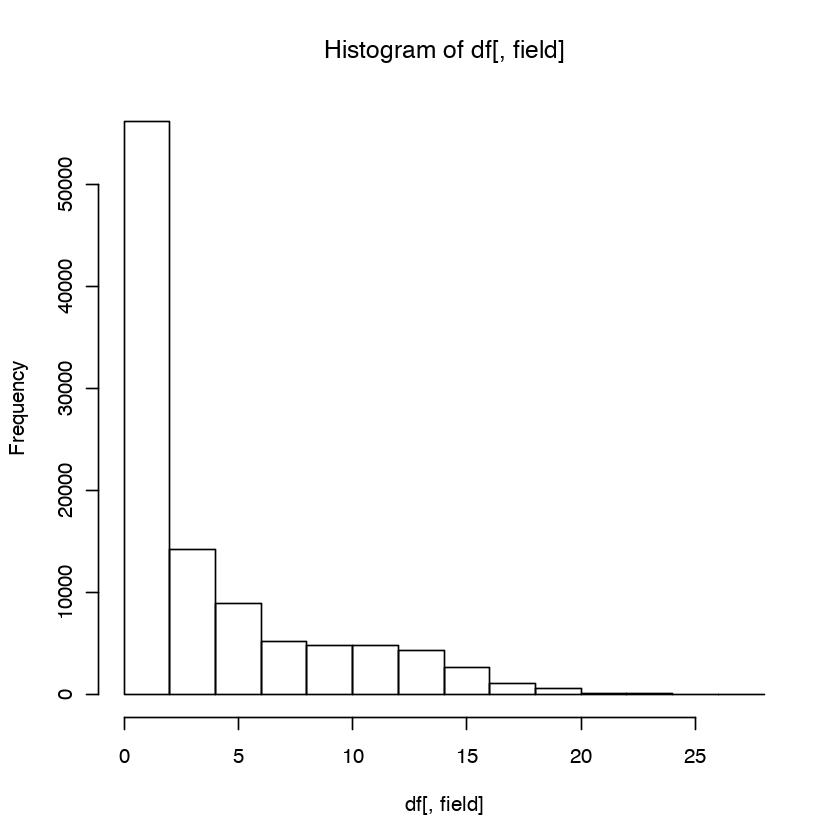

In [73]:
hist(df[,field])

In [81]:
field

[1] "Jan20"

In [82]:
xmin <- quantile(ndf[, field], probs=0.025)
xmax <- quantile(ndf[, field], probs=0.975)

In [83]:
vals <- df[,field]

In [85]:
vals <- vals[vals > xmin & vals < xmax]

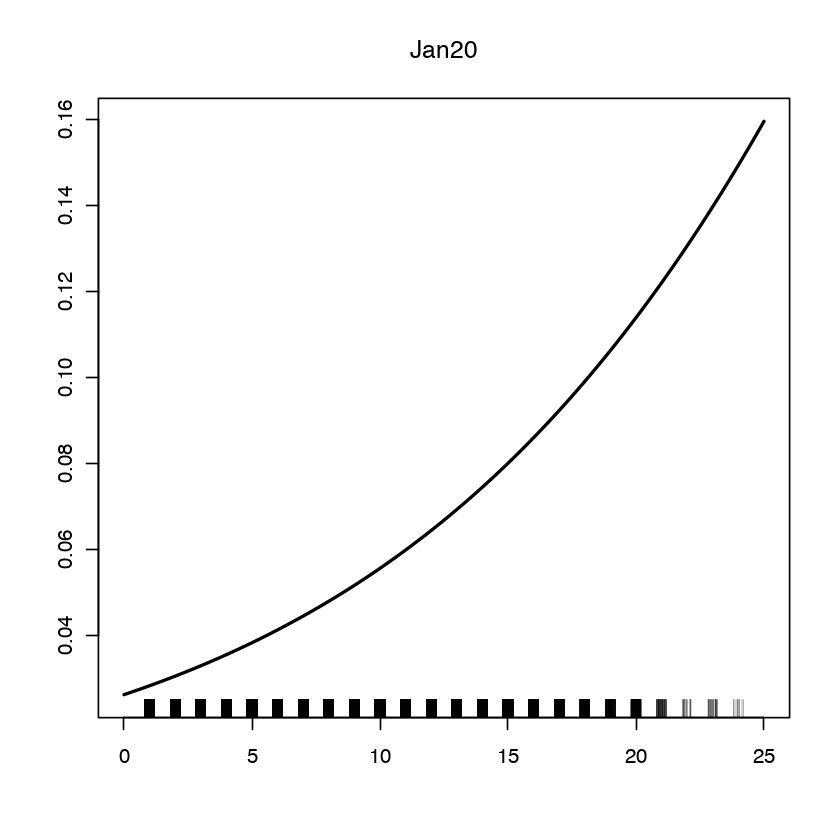

In [86]:
plot(preds ~ test.df[, field], 
         type='l', lty=lty, lwd=2,
         main=field,
         xlab='', 
         ylab='')
xmin <- quantile(ndf[, field], probs=0.025)
xmax <- quantile(ndf[, field], probs=0.975)
vals <- df[,field]
vals <- vals[vals > xmin & vals < xmax]
rug(jitter(vals), col=rgb(0,0,0,0.2))

In [80]:
range(df[,field])

[1]  0 28

In [18]:
paste0('^', field, '$')

[1] "^Tmean$"

In [35]:
sqs

[1] "JanTmin"    "etopo1"     "lat"        "Mar20"      "vpd"       
 [6] "ddAugJul"   "cwd"        "AugMaxT"    "ddAugJun"   "PPT"       
[11] "summerP2"   "POctSep"    "Pmean"      "PMarAug"    "max.drop"  
[16] "age"        "Acs"        "maxT"       "mi"         "OctTmin"   
[21] "OctMin"     "summerP0"   "summerP1"   "sum9"       "PcumOctSep"
[26] "Tmin"       "MarMin"     "wd"

In [37]:
cubs

[1] "AugTmean"    "lat"         "TMarAug"     "JanMin"      "minT"       
 [6] "Jan20"       "fallTmean"   "lon"         "Tvar"        "MarTmin"    
[11] "AugTmax"     "winterMin"   "OptTsum"     "age"         "sum9"       
[16] "Tmean"       "summerTmean" "density"     "TOctSep"

In [39]:
field %in% sqs & field %in% cubs

[1] TRUE

In [51]:
coef(summary(mod))[grep(paste0('^', field, '|:', field), row.names(coef(summary(mod)))), 4]

Jan20_cub         Jan20     lon:Jan20  etopo1:Jan20     lat:Jan20 
 8.624060e-67  2.523837e-06  5.873519e-04  1.850135e-02  5.872650e-01 
density:Jan20 
 6.698310e-01

In [95]:
vars <- c('TMarAug','Tmean','Tvar','ddAugJul','AugTmean','maxAugT','summerTmean','OptTsum',
          'JanTmin', 'Jan20', 'Acs', 'minT','summerP0', 'vpd', 'cwd', 'wd')
varnms <- c('Growing season (Mar - Aug) temperature', 'Annual mean temperature', 'Seasonal temperature variation',
            'Degree days from Aug to Jul', 'Mean August temperature', 'Frequency of ≥ 18.3 °C temperature in Aug',
            'Mean summer temperature', 'Days with optimum summer temperatures', 
            'January minimum temperature', 'Days with a ≤-20 °C temperature in Jan','Average duration of cold snaps', 
            'Minimum daily temperature (Aug-Jul)', 'Summer precipitation', 'Vapor pressure deficit', 
            'Cumulative climatic water deficit', 'Water deficit')

In [44]:
med.df <- data.frame(t(apply(ndf, 2, median, na.rm=TRUE)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

In [96]:
png(paste0(out,'biovariate_plot_',i,'.png'), width=14, height=12, units="in", res=300)
par(mfrow=c(4,4),mar=c(3.5,3.5,3,1))
for (field in vars) {
    j <- which(vars==field)
    test.df <- med.df
    xmin <- quantile(ndf[, field], probs=0.025, na.rm=TRUE)
    xmax <- quantile(ndf[, field], probs=0.975, na.rm=TRUE)
    test.df[, field] <- seq(xmin, xmax, length=100)
    if(field %in% sqs & field %in% cubs){
        test.df[, paste(field, '_sq')] <- test.df[, field]^2
        test.df[, paste(field, '_cub')] <- test.df[, field]^3
    }else if(field %in% sqs){
        test.df[, paste(field, '_sq')] <- test.df[, field]^2  
    }else if(field %in% cubs){
        test.df[, paste(field, '_cub')] <- test.df[, field]^3
    }
    preds <- predict(mod, newdata=test.df, type="response")
    plot(preds ~ test.df[, field], 
         type='l', lty=1, lwd=2,
         main=varnms[j],
         xlab='', 
         ylab='')
    vals <- df[,field]
    vals <- vals[vals > xmin & vals < xmax]
    rug(jitter(vals), col=rgb(0,0,0,0.2))
}
dev.off()

pdf 
  2

In [97]:
vars <- c('lon', 'lat', 'etopo1', 'age', 'density', 'sum9_diff')
varnms <- c('Longitude', 'Latitude', 'Elevation', 'Stand age', 'Tree density', 'Beetle pressure')

In [98]:
png(paste0(out,'biovariate_plot_density_',i,'.png'), width=10, height=6, units="in", res=300)
par(mfrow=c(2,3),mar=c(3.5,3.5,3,1))
for (field in vars) {
    j <- which(vars==field)
    test.df <- med.df
    xmin <- quantile(ndf[, field], probs=0.025, na.rm=TRUE)
    xmax <- quantile(ndf[, field], probs=0.975, na.rm=TRUE)
    test.df[, field] <- seq(xmin, xmax, length=100)
    if(field %in% sqs & field %in% cubs){
        test.df[, paste(field, '_sq')] <- test.df[, field]^2
        test.df[, paste(field, '_cub')] <- test.df[, field]^3
    }else if(field %in% sqs){
        test.df[, paste(field, '_sq')] <- test.df[, field]^2  
    }else if(field %in% cubs){
        test.df[, paste(field, '_cub')] <- test.df[, field]^3
    }
    preds <- predict(mod, newdata=test.df, type="response")
    plot(preds ~ test.df[, field], 
         type='l', lty=1, lwd=2,
         main=varnms[j],
         xlab='', 
         ylab='')
    vals <- df[,field]
    vals <- vals[vals > xmin & vals < xmax]
    rug(jitter(vals), col=rgb(0,0,0,0.2))
}
dev.off()

pdf 
  2